**Cofidence Interval**

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [3]:
#mean of all drink coffee
print(coffee_red["drinks_coffee"].mean())

#mean of people don't drink coffee
print(1 -  coffee_red["drinks_coffee"].mean())

0.595
0.405


`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [4]:
#mean of height of individuals who drink coffee
print(coffee_red[coffee_red["drinks_coffee"]==True].height.mean())

#mean of height of individuals who don't drink coffee
print(coffee_red[coffee_red["drinks_coffee"]==False].height.mean())

68.11962990858618
66.78492279927877


`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [5]:
#get new sample from data, size=200
bootsample = coffee_red.sample(200, replace=True)

In [6]:
#mean of drinks_coffee of new sample (bootsample)
bootsample["drinks_coffee"].mean()

0.605

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

(array([  16.,  106.,  590., 1831., 2989., 2644., 1352.,  377.,   86.,
           9.]),
 array([65.24631713, 65.56293231, 65.8795475 , 66.19616268, 66.51277787,
        66.82939305, 67.14600823, 67.46262342, 67.7792386 , 68.09585379,
        68.41246897]),
 <BarContainer object of 10 artists>)

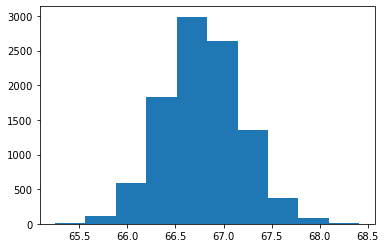

In [7]:
import matplotlib.pyplot as plt
boot_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means)

In [8]:
#that mean 95% from the data is located in these values
np.percentile(boot_means,2.5),np.percentile(boot_means,97.5) 

(65.99291328157521, 67.58402738281573)

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

**we can compare the confident value from the actual value 
mean height of individuals who don't drink coffee = 66.7 
and the interval located between 65.9 and 67.5**

**calculating the difference between mean in traditional technique without using confidence interval test**

In [11]:
import statsmodels.stats.api as sms
x1 = coffee_red[coffee_red["drinks_coffee"]==True]['height']
x2 = coffee_red[coffee_red["drinks_coffee"]==False]['height']
cm = sms.CompareMeans(sms.DescrStatsW(x1),sms.DescrStatsW(x2))
cm.tconfint_diff(usevar='unequal')

(0.3960010615918562, 2.2734131570228913)

**You look that the 2 techniques have the same output**